In [1]:
# Import pustaka yang dibutuhkan
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Baca dataset
df = pd.read_csv('Student Depression Dataset.csv')

# Tampilkan beberapa baris awal dataset
print(df.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [5]:
# Pilih kolom yang relevan untuk clustering
selected_columns = ['Sleep Duration', 'Dietary Habits', 'Work/Study Hours', 'Study Satisfaction']
df_cluster = df[selected_columns].copy()

In [7]:
# Encoding kolom kategorikal
label_encoder = LabelEncoder()
categorical_columns = ['Sleep Duration', 'Dietary Habits']

for col in categorical_columns:
    df_cluster[col] = label_encoder.fit_transform(df_cluster[col])

# Normalisasi kolom numerik
scaler = StandardScaler()
numerical_columns = ['Work/Study Hours', 'Study Satisfaction']
df_cluster[numerical_columns] = scaler.fit_transform(df_cluster[numerical_columns])

# Lihat data yang sudah diproses
print(df_cluster.head())

   Sleep Duration  Dietary Habits  Work/Study Hours  Study Satisfaction
0               0               0         -1.121213           -0.693425
1               0               1         -1.121213            1.510636
2               2               0          0.497095            1.510636
3               1               1         -0.851495           -0.693425
4               0               1         -1.660650            0.041262


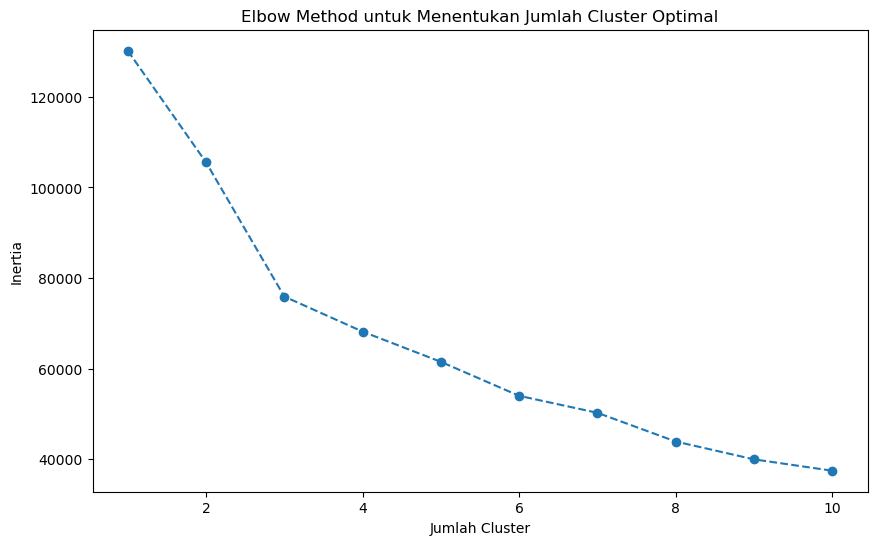

In [9]:
# Tentukan jumlah cluster optimal dengan metode Elbow
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

# Visualisasi hasil Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [11]:
# Lakukan clustering dengan jumlah cluster optimal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Lihat hasil clustering
print(df_cluster.head())

   Sleep Duration  Dietary Habits  Work/Study Hours  Study Satisfaction  \
0               0               0         -1.121213           -0.693425   
1               0               1         -1.121213            1.510636   
2               2               0          0.497095            1.510636   
3               1               1         -0.851495           -0.693425   
4               0               1         -1.660650            0.041262   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


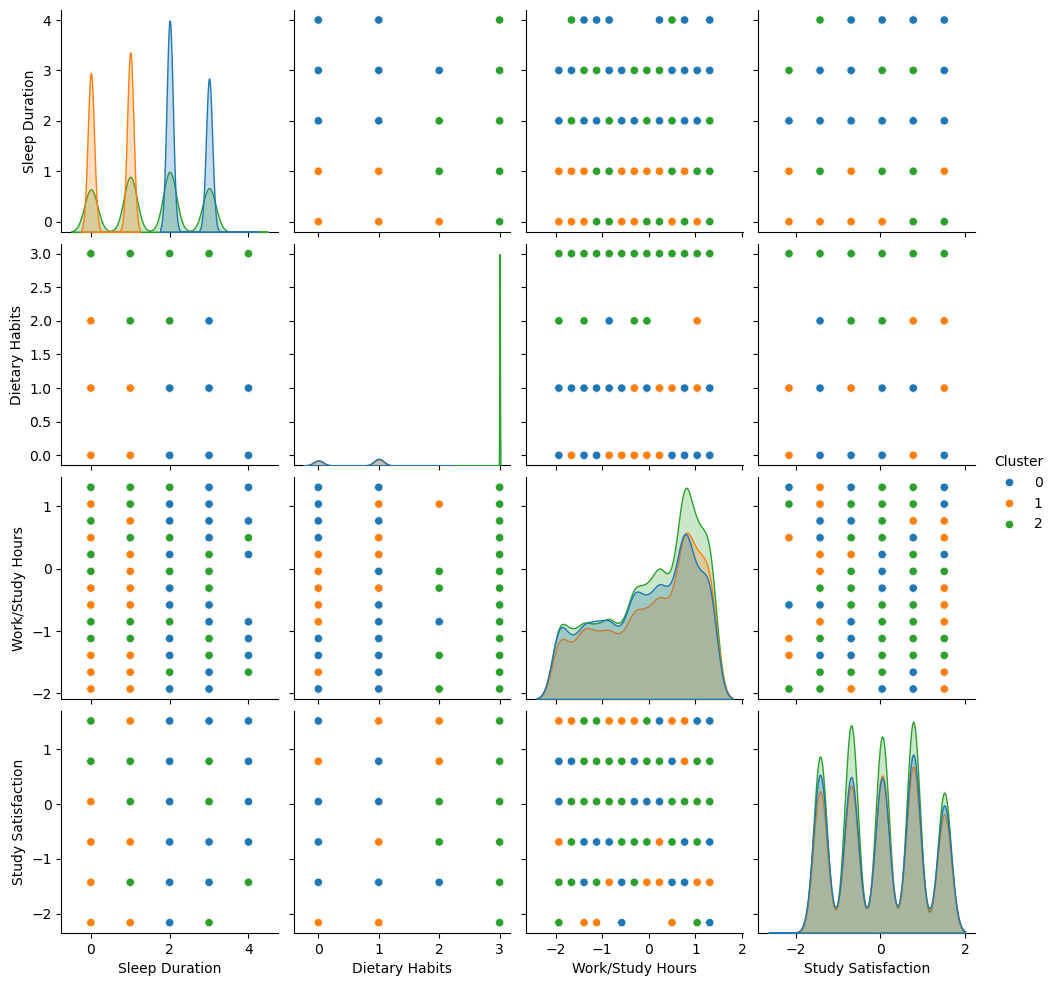

In [13]:
# Visualisasi hasil clustering
sns.pairplot(df_cluster, hue='Cluster', palette='tab10')
plt.show()